In [6]:
#Name: Rajat Kumar
#Topic: Car Price Prediction with Machine Learning

In [7]:
#Importing Libraries

In [8]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [9]:
#Load Data

In [10]:
df = pd.read_csv('car data.csv')

In [11]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
#Data Preprocessing

In [13]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(2)

In [15]:
df.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [16]:
#Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [19]:
#Split Data Into Train and Test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#x = df.drop('Selling_Price', axis=1)
#y = df['Selling_Price']
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=43)

In [22]:
x_test

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
288,city,2015,8.40,13.60,34000,Petrol,Dealer,Manual
130,Honda CB Hornet 160R,2017,0.75,0.87,11000,Petrol,Individual,Manual
245,verna,2012,5.20,9.40,71000,Diesel,Dealer,Manual
160,Bajaj Avenger Street 220,2011,0.45,0.95,24000,Petrol,Individual,Manual
124,Royal Enfield Classic 500,2012,0.95,1.75,11500,Petrol,Individual,Manual
...,...,...,...,...,...,...,...,...
176,Honda Karizma,2011,0.35,1.05,30000,Petrol,Individual,Manual
65,etios liva,2014,4.75,6.95,45000,Diesel,Dealer,Manual
11,ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual
67,fortuner,2010,9.25,20.45,59000,Diesel,Dealer,Manual


In [23]:
x_train

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual
36,dzire,2015,4.65,7.20,48767,Petrol,Dealer,Manual
94,corolla altis,2008,4.00,22.78,89000,Petrol,Dealer,Automatic
208,i20,2017,7.90,8.10,3435,Petrol,Dealer,Manual
266,amaze,2014,3.65,7.00,35000,Petrol,Dealer,Manual
...,...,...,...,...,...,...,...,...
145,TVS Apache RTR 160,2012,0.60,0.81,19000,Petrol,Individual,Manual
16,ertiga,2015,7.25,10.79,41678,Diesel,Dealer,Manual
58,etios g,2014,4.10,6.80,39485,Petrol,Dealer,Manual
277,city,2015,9.70,13.60,21780,Petrol,Dealer,Manual


In [24]:
#Data Visualisation

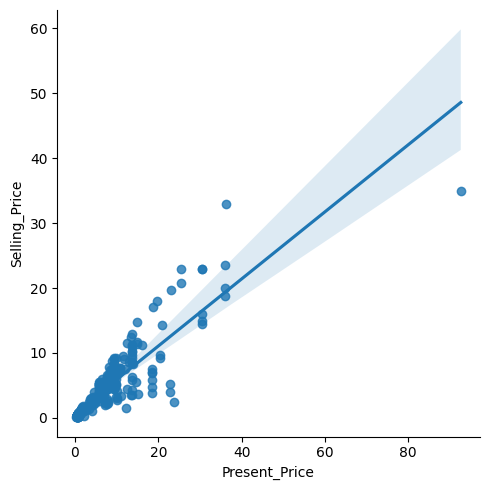

In [25]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=df)

In [26]:
regression = linear_model.LinearRegression()

In [27]:
regression.fit(df[['Present_Price']],df['Selling_Price'])

LinearRegression()

In [28]:
regression.predict([[5.59]]) #Prediction

C:\Users\Windows 10\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.60760858])

In [29]:
# Prediction Formula 'Y = M * X + C'

In [30]:
regression.coef_   #Slope/Coefficient/Gradient = M

array([0.51690052])

In [31]:
regression.intercept_  #Intercept = C

np.float64(0.7181346881283415)